# Metehan Ayhan - Deep Learning, Artificial Neural Networks

In [3]:
#pip install tensorflow

In [4]:
# Deep Neural Networks Classification

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('pima-indians-diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.shape

(768, 9)

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
x=df.drop('Outcome',axis=1)
y=df[['Outcome']]

In [13]:
model=Sequential()
model.add(Dense(120,activation='relu')) #input layer
model.add(Dense(80,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #en sonra relu olmaz binary classification da sigmoid olmalı. cevap evet hayır old için 1 olmalı.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from sklearn.preprocessing import normalize, scale

In [15]:
x=scale(x)

In [16]:
history=model.fit(x,y,epochs=100,batch_size=32,validation_split=.20,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5508 - loss: 0.6894 - val_accuracy: 0.7792 - val_loss: 0.6683
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.6449 - val_accuracy: 0.7532 - val_loss: 0.5997
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7713 - loss: 0.5548 - val_accuracy: 0.7597 - val_loss: 0.5038
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7864 - loss: 0.4411 - val_accuracy: 0.7727 - val_loss: 0.5113
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7895 - loss: 0.4540 - val_accuracy: 0.7727 - val_loss: 0.4943
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7761 - loss: 0.4708 - val_accuracy: 0.7597 - val_loss: 0.4861
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7960 - loss: 0.4389 - val_accuracy: 0.7597 - val_loss: 0.5107
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7935 - loss: 0.4307 - val_accuracy: 0.7792 - 

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           1,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           9,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           1,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,811 (218.02 KB)

 Trainable params: 18,603 (72.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,208 (145.35 KB)

In [18]:
import matplotlib.pyplot as plt

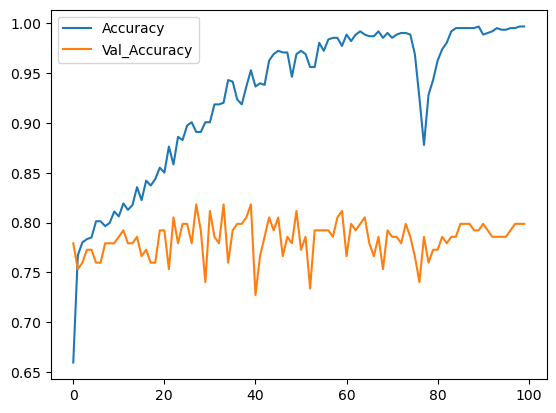

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [20]:
#DNN - Regression

In [21]:
import pandas as pd

In [22]:
df=pd.read_pickle('kc_house.pkl') #kc data feature eng. yapılmıs hali..

In [23]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,...,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,...,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,...,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,...,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x=df.drop('price',axis=1)

In [25]:
y=df[['price']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [28]:
model=Sequential()
model.add(Dense(120,activation='relu')) 
model.add(Dense(80,activation='relu')) 
model.add(Dense(64,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

In [29]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1500,verbose=0)

In [30]:
tahmin=model.predict(x_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
r2_score(y_test,tahmin)

0.8321275427930537

In [33]:
mean_squared_error(y_test,tahmin)**.5

92701.1819035365

In [34]:
loss_f=pd.DataFrame(history.history)

<Axes: >

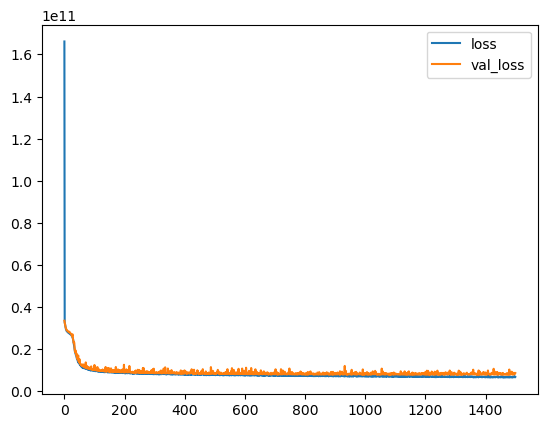

In [35]:
loss_f.plot()